<a href="https://colab.research.google.com/github/WhiskeyMaDawg/SC1015_DataScience_Project/blob/main/Decision_Tree_(Outliers_IQR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree**
## **(Note: Data Cleaning and EDA were included for reference. Decision Tree ML was done after those sections)**

# **Import Data**

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from google.colab import files
import io
sb.set() # set the default Seaborn style for graphics

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')
songdf = pd.read_csv('gdrive/My Drive/SC1015 Project/SpotifyFinalAPI.csv')
songdf.head()

Mounted at /content/gdrive


,track_id,track_name_x,popularity,track_uri,artist_name,artist_popularity,artist_genres,album,track_name_y,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,89,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),Shape of You,0.825,0.652,95.977,-3.183,0.931,0.0802,0.000000,0.0931,0.58100
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,95,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,Blinding Lights,0.514,0.730,171.005,-5.934,0.334,0.0598,0.000095,0.0897,0.00146
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,68,spotify:track:1rgnBhdG2JDFTbYkYRZAku,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,Dance Monkey,0.826,0.593,98.083,-6.401,0.541,0.0976,0.000161,0.1700,0.68800
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),88,spotify:track:0e7ipj03S05BNilyu5bRzt,Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,rockstar (feat. 21 Savage),0.585,0.520,159.801,-6.136,0.129,0.0712,0.000070,0.1310,0.12400
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,90,spotify:track:7qEHsqek33rTcFNT9PFqLf,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,Someone You Loved,0.501,0.405,109.891,-5.679,0.446,0.0319,0.000000,0.1050,0.75100


# **Data Prepartion and Cleaning**


In [3]:
# checking the size of the dataframe
print("Data dimensions : ", songdf.shape)
print(songdf.dtypes)

Data dimensions :  (791, 18)
track_id              object
track_name_x          object
popularity             int64
track_uri             object
artist_name           object
artist_popularity      int64
artist_genres         object
album                 object
track_name_y          object
danceability         float64
energy               float64
tempo                float64
loudness             float64
valence              float64
speechiness          float64
instrumentalness     float64
liveness             float64
acousticness         float64
dtype: object


###**Renaming the column names**

In [4]:
# Renaming the column names
songdf = songdf.rename(columns={"track_name_x":"title", "track_artist": "artist", "track_popularity":"popularity", "duration_ms":"duration_min", "artist_popularity":"artist popularity"})
songdf.head()

,track_id,title,popularity,track_uri,artist_name,artist popularity,artist_genres,album,track_name_y,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,89,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),Shape of You,0.825,0.652,95.977,-3.183,0.931,0.0802,0.000000,0.0931,0.58100
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,95,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,Blinding Lights,0.514,0.730,171.005,-5.934,0.334,0.0598,0.000095,0.0897,0.00146
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,68,spotify:track:1rgnBhdG2JDFTbYkYRZAku,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,Dance Monkey,0.826,0.593,98.083,-6.401,0.541,0.0976,0.000161,0.1700,0.68800
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),88,spotify:track:0e7ipj03S05BNilyu5bRzt,Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,rockstar (feat. 21 Savage),0.585,0.520,159.801,-6.136,0.129,0.0712,0.000070,0.1310,0.12400
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,90,spotify:track:7qEHsqek33rTcFNT9PFqLf,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,Someone You Loved,0.501,0.405,109.891,-5.679,0.446,0.0319,0.000000,0.1050,0.75100


In [5]:
song2df = songdf
song2df.head()

,track_id,title,popularity,track_uri,artist_name,artist popularity,artist_genres,album,track_name_y,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,89,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),Shape of You,0.825,0.652,95.977,-3.183,0.931,0.0802,0.000000,0.0931,0.58100
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,95,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,Blinding Lights,0.514,0.730,171.005,-5.934,0.334,0.0598,0.000095,0.0897,0.00146
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,68,spotify:track:1rgnBhdG2JDFTbYkYRZAku,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,Dance Monkey,0.826,0.593,98.083,-6.401,0.541,0.0976,0.000161,0.1700,0.68800
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),88,spotify:track:0e7ipj03S05BNilyu5bRzt,Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,rockstar (feat. 21 Savage),0.585,0.520,159.801,-6.136,0.129,0.0712,0.000070,0.1310,0.12400
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,90,spotify:track:7qEHsqek33rTcFNT9PFqLf,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,Someone You Loved,0.501,0.405,109.891,-5.679,0.446,0.0319,0.000000,0.1050,0.75100


### **Change Categorical Variables from numeric to category**

In [6]:
#Check
"""
song2df.drop("speech", axis=1, inplace=True) 
song2df.drop("instrumental", axis=1, inplace=True) 
song2df.drop("live performance", axis=1, inplace=True) 

"""

'\nsong2df.drop("speech", axis=1, inplace=True) \nsong2df.drop("instrumental", axis=1, inplace=True) \nsong2df.drop("live performance", axis=1, inplace=True) \n\n'

In [7]:
speechiness_cat = pd.cut(song2df.speechiness,bins=[0,0.33,0.66,1.0],labels=['Words','Mix','Music'])
song2df.insert(8,'speech', speechiness_cat) 
song2df.drop(columns=["speechiness"], axis=1)

bins =[-np.inf,0.5,1]
instrumentalness_cat = pd.cut(song2df.instrumentalness,bins,labels=['Vocal', 'No Vocals'])
song2df.insert(11,'instrumental', instrumentalness_cat)


bins =[-np.inf,0.8,1]
live_performance = pd.cut(song2df.liveness,bins,labels=['No', 'Yes'])
song2df.insert(13,'live performance', live_performance)

newSongDf = song2df.drop(columns=["speechiness", "instrumentalness", "liveness"], axis=1)

### **Reorder columns for better viewing**

In [8]:
#shift popularity (response) to the back for better viewing
tp = newSongDf.pop("popularity")
newSongDf["popularity"] = tp
newSongDf.head(5)

,track_id,title,track_uri,artist_name,artist popularity,artist_genres,album,speech,track_name_y,danceability,instrumental,energy,live performance,tempo,loudness,valence,acousticness,popularity
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),Words,Shape of You,0.825,Vocal,0.652,No,95.977,-3.183,0.931,0.58100,89
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,Words,Blinding Lights,0.514,Vocal,0.730,No,171.005,-5.934,0.334,0.00146,95
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,spotify:track:1rgnBhdG2JDFTbYkYRZAku,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,Words,Dance Monkey,0.826,Vocal,0.593,No,98.083,-6.401,0.541,0.68800,68
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),spotify:track:0e7ipj03S05BNilyu5bRzt,Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,Words,rockstar (feat. 21 Savage),0.585,Vocal,0.520,No,159.801,-6.136,0.129,0.12400,88
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,spotify:track:7qEHsqek33rTcFNT9PFqLf,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,Words,Someone You Loved,0.501,Vocal,0.405,No,109.891,-5.679,0.446,0.75100,90


### **Change popularity to categorical for decision tree**
Popular: Above 80
<br>
Not popular: Below 80

In [9]:
#Check
#newSongDf.drop('popularity categorical', axis=1,inplace=True)

In [10]:
bins =[-np.inf,80,100]
popularity_cat = pd.cut(newSongDf.popularity,bins,labels=['Not Popular', 'Popular'])
newSongDf.insert(15,'popularity categorical', popularity_cat)

In [11]:
#shift popularity (response) to the back for better viewing
pc = newSongDf.pop("popularity categorical")
newSongDf["popularity categorical"] = pc
newSongDf.head(5)


,track_id,title,track_uri,artist_name,artist popularity,artist_genres,album,speech,track_name_y,danceability,instrumental,energy,live performance,tempo,loudness,valence,acousticness,popularity,popularity categorical
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),Words,Shape of You,0.825,Vocal,0.652,No,95.977,-3.183,0.931,0.58100,89,Popular
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,Words,Blinding Lights,0.514,Vocal,0.730,No,171.005,-5.934,0.334,0.00146,95,Popular
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,spotify:track:1rgnBhdG2JDFTbYkYRZAku,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,Words,Dance Monkey,0.826,Vocal,0.593,No,98.083,-6.401,0.541,0.68800,68,Not Popular
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),spotify:track:0e7ipj03S05BNilyu5bRzt,Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,Words,rockstar (feat. 21 Savage),0.585,Vocal,0.520,No,159.801,-6.136,0.129,0.12400,88,Popular
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,spotify:track:7qEHsqek33rTcFNT9PFqLf,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,Words,Someone You Loved,0.501,Vocal,0.405,No,109.891,-5.679,0.446,0.75100,90,Popular


In [12]:
newSongDf['popularity categorical'].value_counts()

Not Popular    398
Popular        393
Name: popularity categorical, dtype: int64

### **Extract Numerical and Categorical Data***




In [13]:
songNumData = pd.DataFrame(newSongDf[['danceability', 'energy', 'loudness', 'acousticness', 'valence','tempo','artist popularity','popularity']])
songNumData

,danceability,energy,loudness,acousticness,valence,tempo,artist popularity,popularity
0,0.825,0.652,-3.183,0.58100,0.931,95.977,96,89
1,0.514,0.730,-5.934,0.00146,0.334,171.005,97,95
2,0.826,0.593,-6.401,0.68800,0.541,98.083,78,68
3,0.585,0.520,-6.136,0.12400,0.129,159.801,91,88
4,0.501,0.405,-5.679,0.75100,0.446,109.891,82,90
...,...,...,...,...,...,...,...,...
786,0.790,0.647,-5.983,0.05150,0.654,87.999,96,87
787,0.851,0.551,-5.177,0.15100,0.807,131.922,65,76
788,0.359,0.543,-7.582,0.49200,0.453,68.534,98,87
789,0.471,0.924,-3.906,0.00301,0.725,154.961,71,85


In [14]:
newSongDf.iloc[90]

track_id                                             1EzrEOXmMH3G43AXT1y7pA
title                                                             I'm Yours
track_uri                              spotify:track:1EzrEOXmMH3G43AXT1y7pA
artist_name                                                      Jason Mraz
artist popularity                                                        77
artist_genres             ['acoustic pop', 'neo mellow', 'pop', 'pop rock']
album                                   We Sing. We Dance. We Steal Things.
speech                                                                Words
track_name_y                                                      I'm Yours
danceability                                                          0.703
instrumental                                                          Vocal
energy                                                                0.444
live performance                                                         No
tempo       

In [15]:
songCatData = pd.DataFrame(newSongDf[['speech', 'instrumental']])
songCatData = songCatData.astype('category')
songCatData.describe()

,speech,instrumental
count,791,791
unique,2,2
top,Words,Vocal
freq,763,786


#**EDA and Removing Outliers**

In [16]:
#songNumData = pd.DataFrame(newSongDf[['danceability', 'energy', 'loudness', 'acousticness', 'valence','tempo','artist popularity','popularity']])
songNumData.describe()

,danceability,energy,loudness,acousticness,valence,tempo,artist popularity,popularity
count,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000
mean,0.664961,0.648631,-6.245063,0.203684,0.496515,119.201456,84.298357,72.091024
std,0.140562,0.172123,2.342916,0.234137,0.226602,26.232928,8.073679,24.627284
min,0.209000,0.111000,-18.435000,0.000025,0.059200,64.934000,59.000000,0.000000
25%,0.582500,0.537000,-7.358000,0.028900,0.330500,99.043500,79.000000,74.000000
50%,0.677000,0.672000,-5.833000,0.110000,0.478000,117.993000,85.000000,80.000000
75%,0.762500,0.783000,-4.723000,0.291500,0.669500,135.063500,91.000000,85.000000
max,0.967000,0.988000,-1.190000,0.978000,0.979000,205.846000,100.000000,97.000000


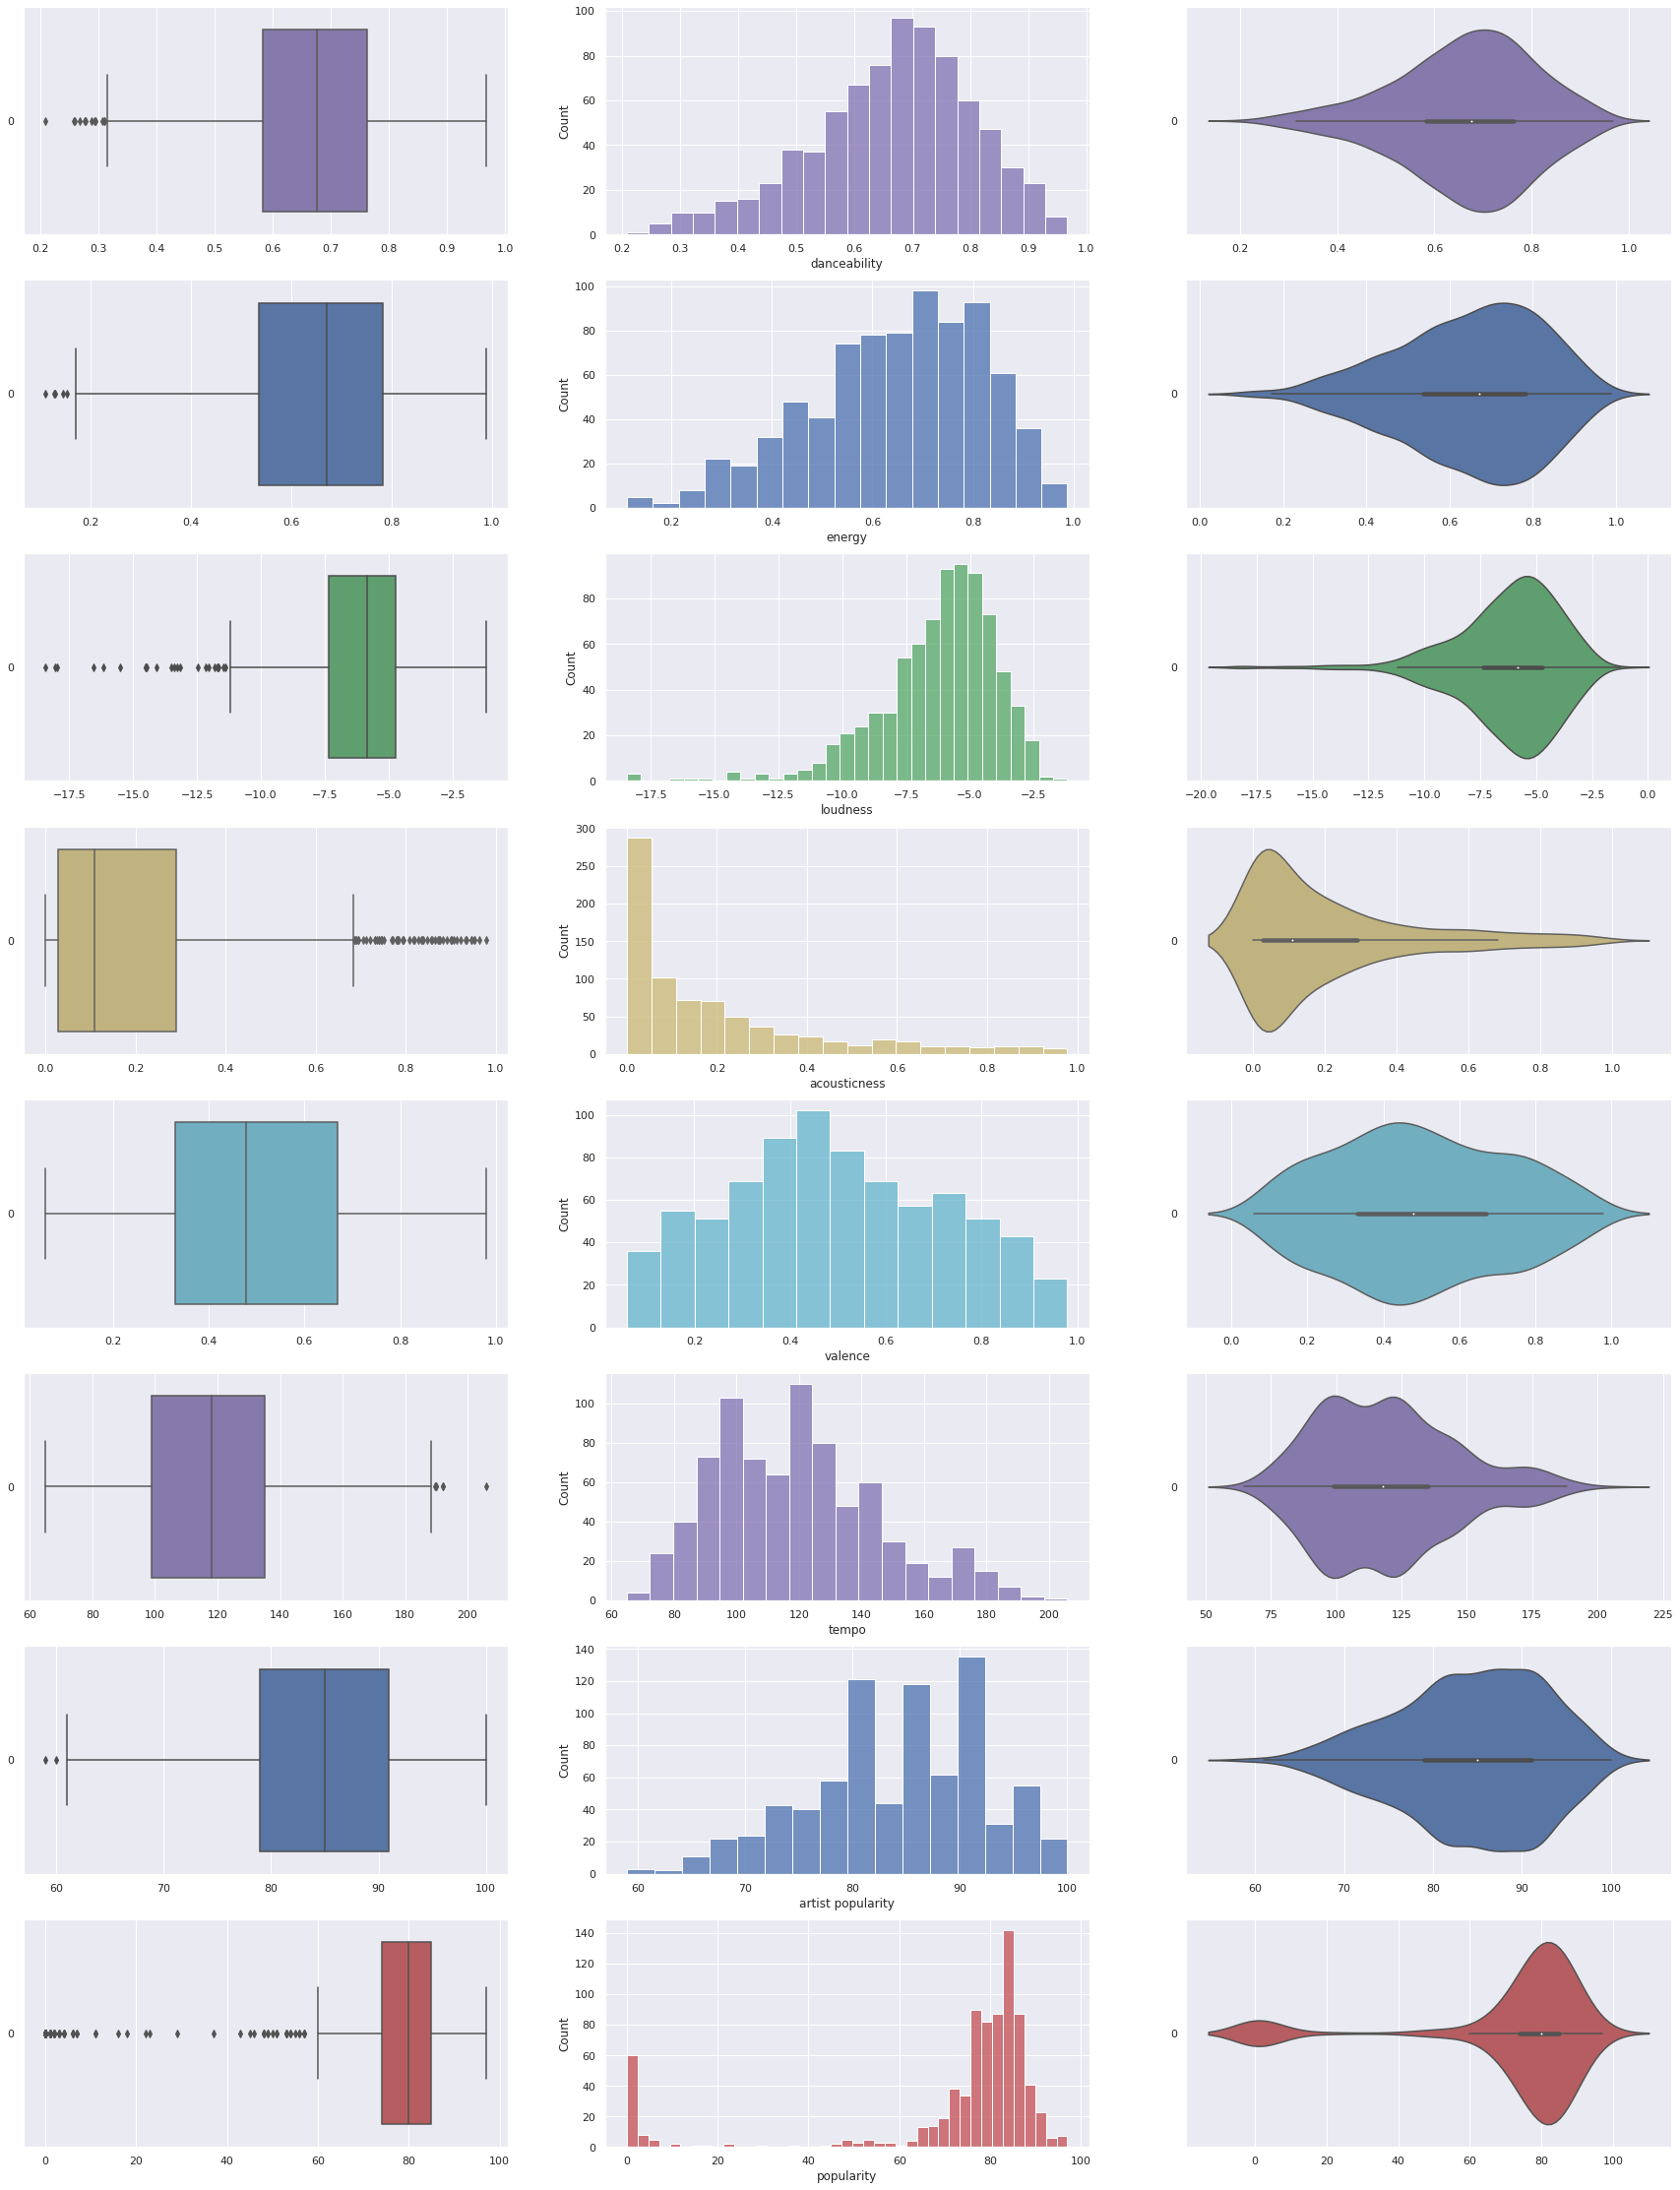

In [17]:
f, axes = plt.subplots(8, 3, figsize=(30, 40))
colours = ['m', 'b', 'g', 'y','c','m','b','r']

count = 0
for var in songNumData:
    sb.boxplot(data = songNumData[var], orient = "h", ax = axes[count,0], color=colours[count])
    sb.histplot(data = songNumData[var], ax = axes[count,1], color=colours[count])
    sb.violinplot(data = songNumData[var], orient = "h", ax = axes[count,2], color=colours[count])
    count += 1

## **Remove Outliers: Popularity**

### The distribution of values in the sample of popularity seems Gaussian-like, so we used the standard deviation of the sample as a cut-off for identifying outliers.

In [18]:
#Calculate Mean and IQR
mean_popularity = songNumData['popularity'].mean()
Q1 = songNumData['popularity'].quantile(0.25)
Q3 = songNumData['popularity'].quantile(0.75)
IQR = Q3 - Q1
print("Mean: ", mean_popularity)
print("IQR: ", IQR)

#Calculate outliers (if data<(Q1-1.5*IQR) or data>(Q3+1.5*IQR))
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
print("Upper bound: ", upper)
print("Lower bound:", lower)

Mean:  72.09102402022756
IQR:  11.0
Upper bound:  101.5
Lower bound: 57.5


###**Remove outliers according to the upper and lower bound**

In [19]:
# Rule to identify outliers
rule = ((songNumData['popularity'] < lower) | (songNumData['popularity']  >  upper))

# Count the number of outliers
print("Number of outliers in popularity:")
rule.sum()

Number of outliers in popularity:


103

In [20]:
# Indices or rows corresponding to outleirs
outlierindices = rule.index[rule == True]
outlierindices

Int64Index([  5,   6,   9,  15,  27,  39,  43,  45,  48,  51,
            ...
            475, 482, 544, 551, 567, 602, 609, 610, 678, 775],
           dtype='int64', length=103)

In [21]:
# Remove the outliers based on the row indices obtained above
newSongDf.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
newSongDf

,track_id,title,track_uri,artist_name,artist popularity,artist_genres,album,speech,track_name_y,danceability,instrumental,energy,live performance,tempo,loudness,valence,acousticness,popularity,popularity categorical
0,7qiZfU4dY1lWllzX7mPBI3,Shape of You,spotify:track:7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,96,"['pop', 'uk pop']",÷ (Deluxe),Words,Shape of You,0.825,Vocal,0.652,No,95.977,-3.183,0.931,0.58100,89,Popular
1,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,97,"['canadian contemporary r&b', 'canadian pop', ...",After Hours,Words,Blinding Lights,0.514,Vocal,0.730,No,171.005,-5.934,0.334,0.00146,95,Popular
2,1rgnBhdG2JDFTbYkYRZAku,Dance Monkey,spotify:track:1rgnBhdG2JDFTbYkYRZAku,Tones And I,78,"['australian pop', 'pop']",Dance Monkey,Words,Dance Monkey,0.826,Vocal,0.593,No,98.083,-6.401,0.541,0.68800,68,Not Popular
3,0e7ipj03S05BNilyu5bRzt,rockstar (feat. 21 Savage),spotify:track:0e7ipj03S05BNilyu5bRzt,Post Malone,91,"['dfw rap', 'melodic rap', 'rap']",beerbongs & bentleys,Words,rockstar (feat. 21 Savage),0.585,Vocal,0.520,No,159.801,-6.136,0.129,0.12400,88,Popular
4,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,spotify:track:7qEHsqek33rTcFNT9PFqLf,Lewis Capaldi,82,"['pop', 'uk pop']",Divinely Uninspired To A Hellish Extent,Words,Someone You Loved,0.501,Vocal,0.405,No,109.891,-5.679,0.446,0.75100,90,Popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,4EWCNWgDS8707fNSZ1oaA5,Heartless,spotify:track:4EWCNWgDS8707fNSZ1oaA5,Kanye West,96,"['chicago rap', 'rap']",808s & Heartbreak,Words,Heartless,0.790,Vocal,0.647,No,87.999,-5.983,0.654,0.05150,87,Popular
787,67iAlVNDDdddxqSD2EZhFs,I'm Gonna Be (500 Miles),spotify:track:67iAlVNDDdddxqSD2EZhFs,The Proclaimers,65,"['celtic rock', 'scottish rock']",Sunshine on Leith,Words,I'm Gonna Be (500 Miles),0.851,Vocal,0.551,No,131.922,-5.177,0.807,0.15100,76,Not Popular
788,1dGr1c8CrMLDpV6mPbImSI,Lover,spotify:track:1dGr1c8CrMLDpV6mPbImSI,Taylor Swift,98,['pop'],Lover,Words,Lover,0.359,Vocal,0.543,No,68.534,-7.582,0.453,0.49200,87,Popular
789,2iUmqdfGZcHIhS3b9E9EWq,Everybody Talks,spotify:track:2iUmqdfGZcHIhS3b9E9EWq,Neon Trees,71,"['modern alternative rock', 'modern rock', 'po...",Picture Show,Words,Everybody Talks,0.471,Vocal,0.924,No,154.961,-3.906,0.725,0.00301,85,Popular


## **Visualise plot after removing outliers**

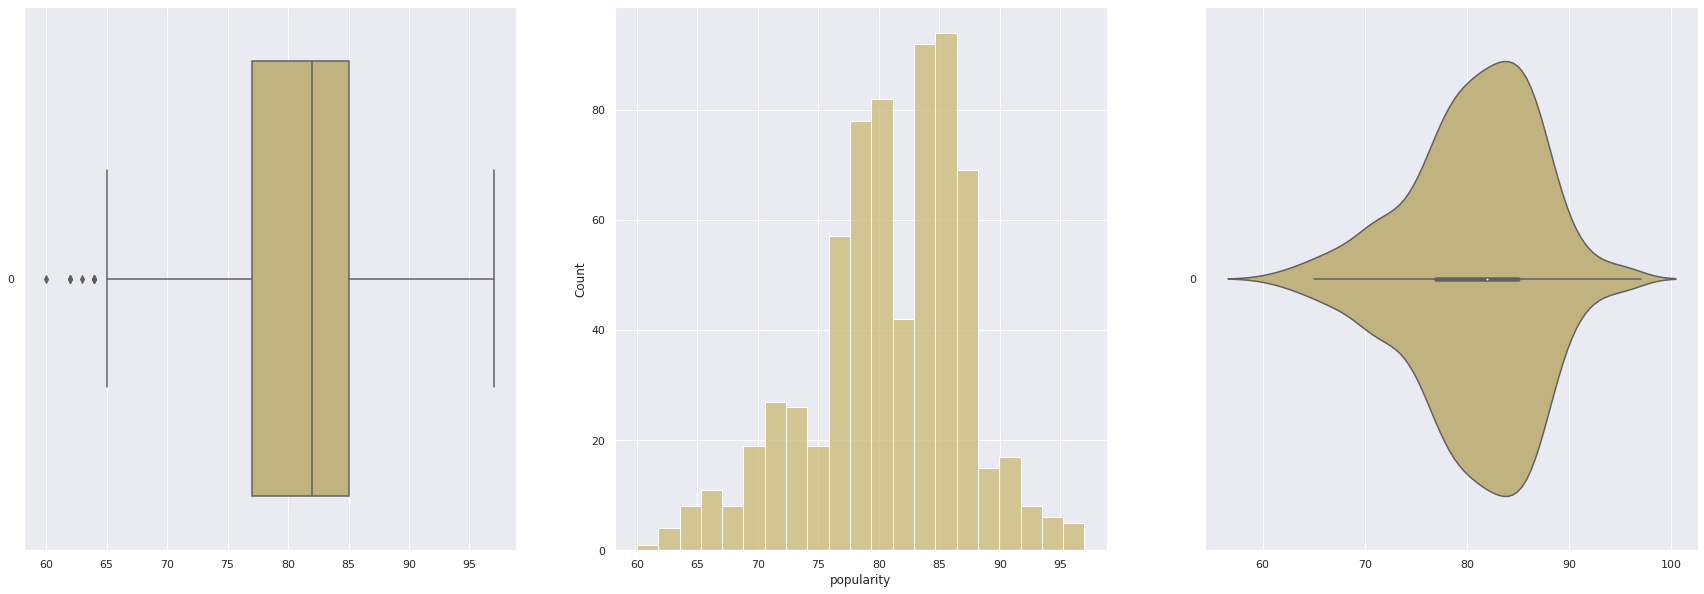

In [22]:
f, axes = plt.subplots(1, 3, figsize=(30, 10))
songNumData = pd.DataFrame(newSongDf[['danceability', 'energy', 'loudness', 'acousticness', 'valence','tempo','artist popularity','popularity']])
sb.boxplot(data = songNumData['popularity'], orient = "h", ax = axes[0], color='y')
sb.histplot(data = songNumData['popularity'], ax = axes[1], color='y')
sb.violinplot(data = songNumData['popularity'], orient = "h", ax = axes[2], color='y')

# **Decision Tree**

Perform a multivariate classification tree with all numerical predictors and categorical predictors, with popularity as response. 

Since popularity ranges from 0 to 100, we will treat popularity with **>=80 as popular** and those that is **<80 as not popular**

The **Decision Tree Classifier**  in sklearn was used

Given that the categorical variables (key, mode, speech and instrumental) are not ordinal, we should not enforce an order with integer encoding (e.g. encoding major as 0 and minor as 1 enforces an implicit order

Hence, to encode the unordered categorical variables, we can use **OneHotEncoding**


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors 
# Recall that songCatData = pd.DataFrame(newSongDf[['speech', 'instrumental']])

ohe.fit(songCatData)
song_cat_ohe = pd.DataFrame(ohe.transform(songCatData).toarray(), 
                                  columns=ohe.get_feature_names_out(songCatData.columns))

# Check the encoded variables
song_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   speech_Mix              791 non-null    float64
 1   speech_Words            791 non-null    float64
 2   instrumental_No Vocals  791 non-null    float64
 3   instrumental_Vocal      791 non-null    float64
dtypes: float64(4)
memory usage: 24.8 KB


### **Combine numerical data with the OHE categorical variables**

In [25]:
#Recall that numerical data are stored in songNumData = pd.DataFrame(newSongDf[['danceability', 'energy', 'loudness', 'acousticness', 'valence','tempo','artist popularity']])

# Extrat songNumData after removing outleirs
songNumData = pd.DataFrame(newSongDf[['danceability', 'energy', 'loudness', 'acousticness', 'valence','tempo','artist popularity','popularity']])

# Extract response variable
popularity_response = newSongDf['popularity categorical']
songData_ohe = pd.concat([songNumData, song_cat_ohe, popularity_response], 
                           sort = False, axis = 1).reindex(index=songNumData.index)

# Check the final dataframe
songData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 0 to 790
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   danceability            688 non-null    float64 
 1   energy                  688 non-null    float64 
 2   loudness                688 non-null    float64 
 3   acousticness            688 non-null    float64 
 4   valence                 688 non-null    float64 
 5   tempo                   688 non-null    float64 
 6   artist popularity       688 non-null    float64 
 7   popularity              688 non-null    float64 
 8   speech_Mix              688 non-null    float64 
 9   speech_Words            688 non-null    float64 
 10  instrumental_No Vocals  688 non-null    float64 
 11  instrumental_Vocal      688 non-null    float64 
 12  popularity categorical  688 non-null    category
dtypes: category(1), float64(12)
memory usage: 86.8 KB


In [26]:
songData_ohe

,danceability,energy,loudness,acousticness,valence,tempo,artist popularity,popularity,speech_Mix,speech_Words,instrumental_No Vocals,instrumental_Vocal,popularity categorical
0,0.825,0.652,-3.183,0.58100,0.931,95.977,96.0,89.0,0.0,1.0,0.0,1.0,Popular
1,0.514,0.730,-5.934,0.00146,0.334,171.005,97.0,95.0,0.0,1.0,0.0,1.0,Popular
2,0.826,0.593,-6.401,0.68800,0.541,98.083,78.0,68.0,0.0,1.0,0.0,1.0,Not Popular
3,0.585,0.520,-6.136,0.12400,0.129,159.801,91.0,88.0,0.0,1.0,0.0,1.0,Popular
4,0.501,0.405,-5.679,0.75100,0.446,109.891,82.0,90.0,0.0,1.0,0.0,1.0,Popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,0.790,0.647,-5.983,0.05150,0.654,87.999,96.0,87.0,0.0,1.0,0.0,1.0,Popular
787,0.851,0.551,-5.177,0.15100,0.807,131.922,65.0,76.0,0.0,1.0,0.0,1.0,Not Popular
788,0.359,0.543,-7.582,0.49200,0.453,68.534,98.0,87.0,0.0,1.0,0.0,1.0,Popular
789,0.471,0.924,-3.906,0.00301,0.725,154.961,71.0,85.0,0.0,1.0,0.0,1.0,Popular


###**Create and Fit Model**
The model was fitted using a **train test split ratio of 0.2**. A **random state of 88** was used to ensure better comparability as we modify variables of the decision tree e.g., depth, variables used etc. 


[Text(0.5, 0.9, 'artist popularity <= 90.5\ngini = 0.487\nsamples = 550\nvalue = [231, 319]\nclass = Popular'),
 Text(0.22, 0.7, 'loudness <= -7.98\ngini = 0.499\nsamples = 405\nvalue = [196, 209]\nclass = Popular'),
 Text(0.12, 0.5, 'danceability <= 0.884\ngini = 0.444\nsamples = 66\nvalue = [22, 44]\nclass = Popular'),
 Text(0.08, 0.3, 'acousticness <= 0.913\ngini = 0.421\nsamples = 63\nvalue = [19, 44]\nclass = Popular'),
 Text(0.04, 0.1, 'gini = 0.402\nsamples = 61\nvalue = [17, 44]\nclass = Popular'),
 Text(0.12, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Not Popular'),
 Text(0.16, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Not Popular'),
 Text(0.32, 0.5, 'energy <= 0.847\ngini = 0.5\nsamples = 339\nvalue = [174, 165]\nclass = Not Popular'),
 Text(0.24, 0.3, 'energy <= 0.643\ngini = 0.496\nsamples = 286\nvalue = [155, 131]\nclass = Not Popular'),
 Text(0.2, 0.1, 'gini = 0.493\nsamples = 102\nvalue = [45, 57]\nclass = Popular'),
 Text(0.28, 0.1, 'gini = 0.48

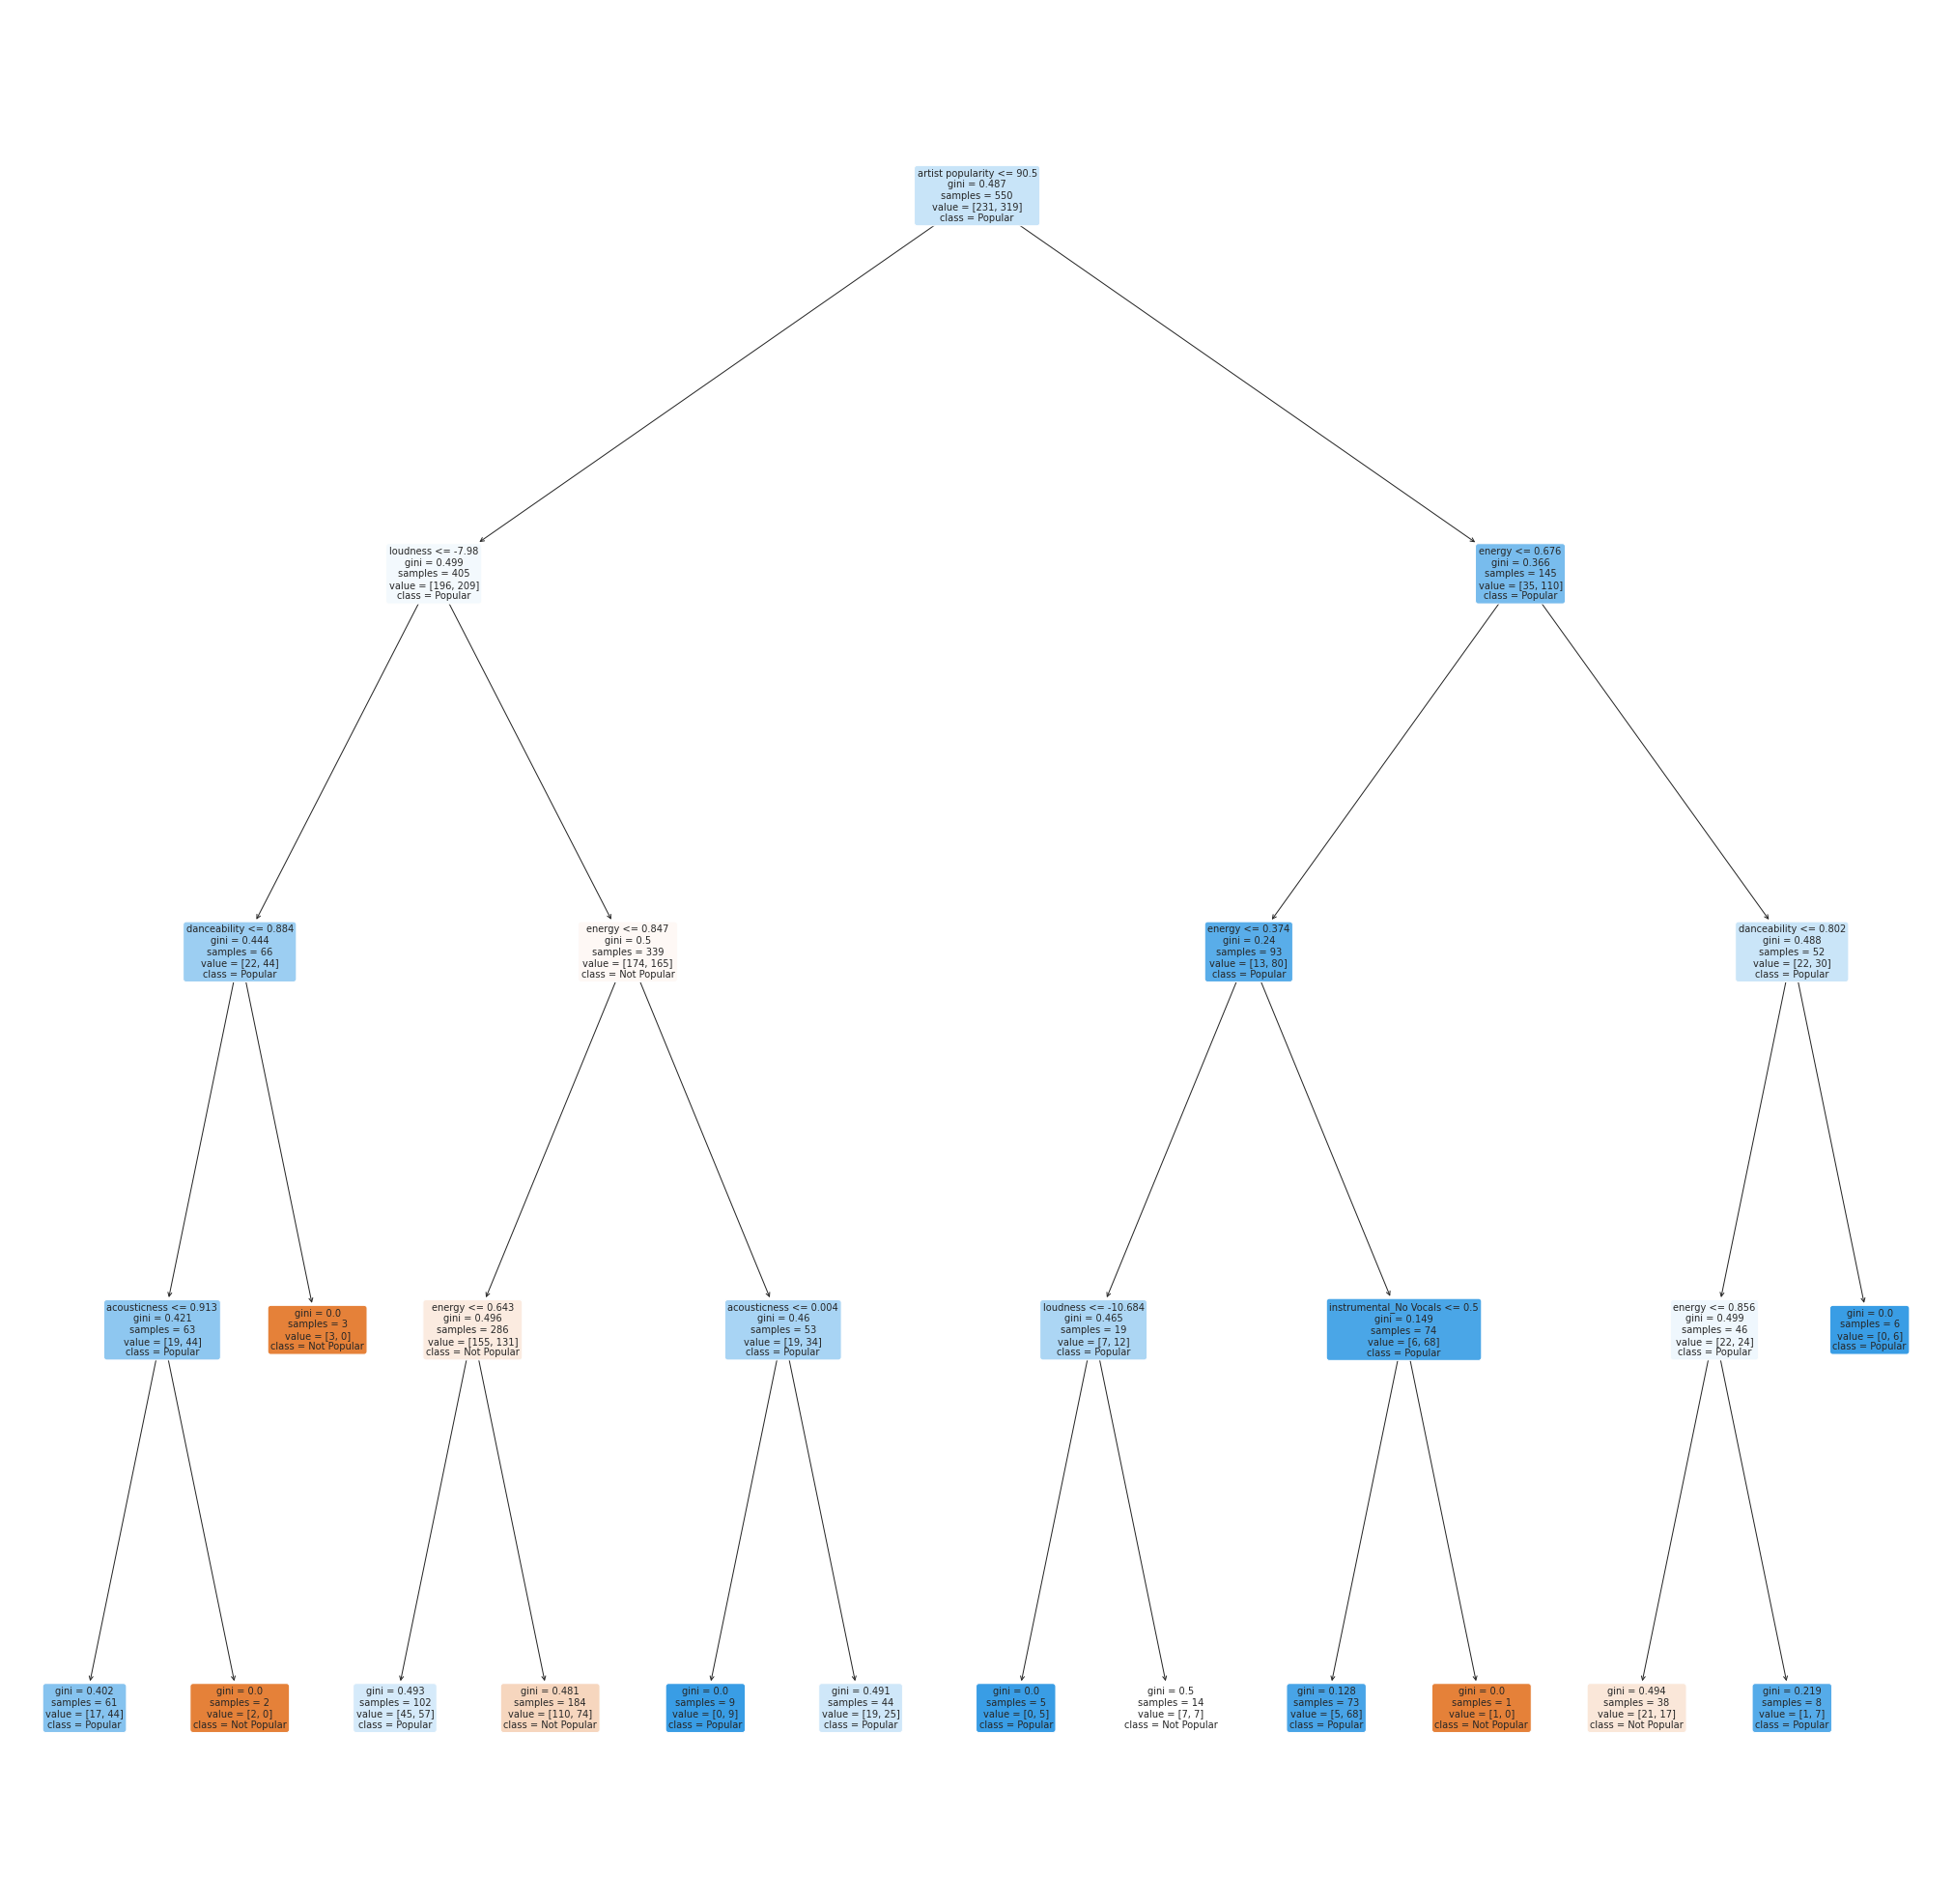

In [27]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(songData_ohe['popularity categorical'])
X = pd.DataFrame(songData_ohe.drop(['popularity categorical','popularity'], axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=88)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree modelz

# Plot the trained Decision Tree
f = plt.figure(figsize=(36,36))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Not Popular","Popular"])

### **Check the accuracy of the Model**

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix.  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

### **Training Data Accuracy**

Train Data
Accuracy  :	 0.6636363636363637

TPR Train :	 0.6927899686520376
TNR Train :	 0.6233766233766234

FPR Train :	 0.37662337662337664
FNR Train :	 0.3072100313479624


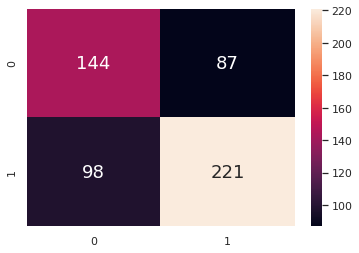

In [28]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### **Test Data Accuracy**

Test Data
Accuracy  :	 0.463768115942029

TPR Test :	 0.5540540540540541
TNR Test :	 0.359375

FPR Test :	 0.640625
FNR Test :	 0.44594594594594594


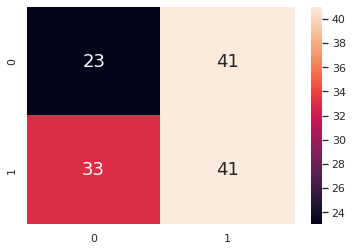

In [29]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

**Analysis**:
The test accuracy of 49% was way below the train accuracy of 66%. This could be due to various factors. For instance, all variables were used in the decision tree to predict the popularity value. This could be a possible factor that resulted in overfitting of the train set.

Hence, we should consider **only using the key features** to predict popularity using the decision tree

##**Determine Feature Importance in Decision Tree**

Therefore, we calculated the most important features used in the decision tree.

This was done by calling the attribute **feature_importances_** which returns the feature importances in an 
arrary of values

In [30]:
dectree.feature_importances_

array([0.11298178, 0.35695384, 0.11726272, 0.10388994, 0.        ,
       0.        , 0.27187044, 0.        , 0.        , 0.03704128,
       0.        ])

In [31]:
#Extract all the features data i.e. drop the 'popularity categorical' & 'popularity' (response) column
features = songData_ohe.copy()
features.drop('popularity categorical', axis=1, inplace=True)
features.drop('popularity', axis=1, inplace=True)
songData_ohe.columns
features.columns

Index(['danceability', 'energy', 'loudness', 'acousticness', 'valence',
       'tempo', 'artist popularity', 'speech_Mix', 'speech_Words',
       'instrumental_No Vocals', 'instrumental_Vocal'],
      dtype='object')

In [32]:
#Create a new dataframe showing importance of features
featuresdf = pd.DataFrame({'Features':features.columns,'Feature_Importance':dectree.feature_importances_})
features_sort = featuresdf.sort_values(by='Feature_Importance', ascending=False)

## **Visualise the importance of the features**

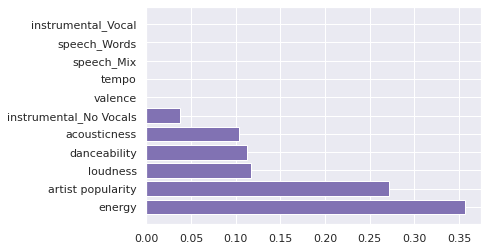

In [33]:
plt.barh(features_sort['Features'], features_sort['Feature_Importance'], color='m')
plt.show()

We can see that **energy** is the most important feature in predicting the song's popularity, followed by **artist popularity** and **loudness**. It seems like the categorical variables of instrumentalness and speechiness were not important in determining the popularity of the song.

##**Multi-variate Decision Tree Using top 3 factors**

As seen, the top 3 factors are **artist popularity, energy and loudness**

In [34]:
top3_factor = pd.DataFrame(newSongDf[['energy','loudness','artist popularity','popularity']])

# Extract response variable
# popularity_response = newSongDf['popularity categorical']
songData_top3 = pd.concat([top3_factor, popularity_response], 
                           sort = False, axis = 1).reindex(index=songNumData.index)

# Check the final dataframe
songData_top3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 0 to 790
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   energy                  688 non-null    float64 
 1   loudness                688 non-null    float64 
 2   artist popularity       688 non-null    int64   
 3   popularity              688 non-null    int64   
 4   popularity categorical  688 non-null    category
dtypes: category(1), float64(2), int64(2)
memory usage: 43.8 KB


In [35]:
songData_top3

,energy,loudness,artist popularity,popularity,popularity categorical
0,0.652,-3.183,96,89,Popular
1,0.730,-5.934,97,95,Popular
2,0.593,-6.401,78,68,Not Popular
3,0.520,-6.136,91,88,Popular
4,0.405,-5.679,82,90,Popular
...,...,...,...,...,...
786,0.647,-5.983,96,87,Popular
787,0.551,-5.177,65,76,Not Popular
788,0.543,-7.582,98,87,Popular
789,0.924,-3.906,71,85,Popular


[Text(0.5, 0.9, 'artist popularity <= 90.5\ngini = 0.487\nsamples = 550\nvalue = [231, 319]\nclass = Popular'),
 Text(0.25, 0.7, 'loudness <= -7.98\ngini = 0.499\nsamples = 405\nvalue = [196, 209]\nclass = Popular'),
 Text(0.125, 0.5, 'artist popularity <= 80.5\ngini = 0.444\nsamples = 66\nvalue = [22, 44]\nclass = Popular'),
 Text(0.0625, 0.3, 'loudness <= -15.023\ngini = 0.496\nsamples = 33\nvalue = [15, 18]\nclass = Popular'),
 Text(0.03125, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Popular'),
 Text(0.09375, 0.1, 'gini = 0.5\nsamples = 30\nvalue = [15, 15]\nclass = Not Popular'),
 Text(0.1875, 0.3, 'energy <= 0.413\ngini = 0.334\nsamples = 33\nvalue = [7, 26]\nclass = Popular'),
 Text(0.15625, 0.1, 'gini = 0.459\nsamples = 14\nvalue = [5, 9]\nclass = Popular'),
 Text(0.21875, 0.1, 'gini = 0.188\nsamples = 19\nvalue = [2, 17]\nclass = Popular'),
 Text(0.375, 0.5, 'energy <= 0.847\ngini = 0.5\nsamples = 339\nvalue = [174, 165]\nclass = Not Popular'),
 Text(0.3125, 0.3, 'e

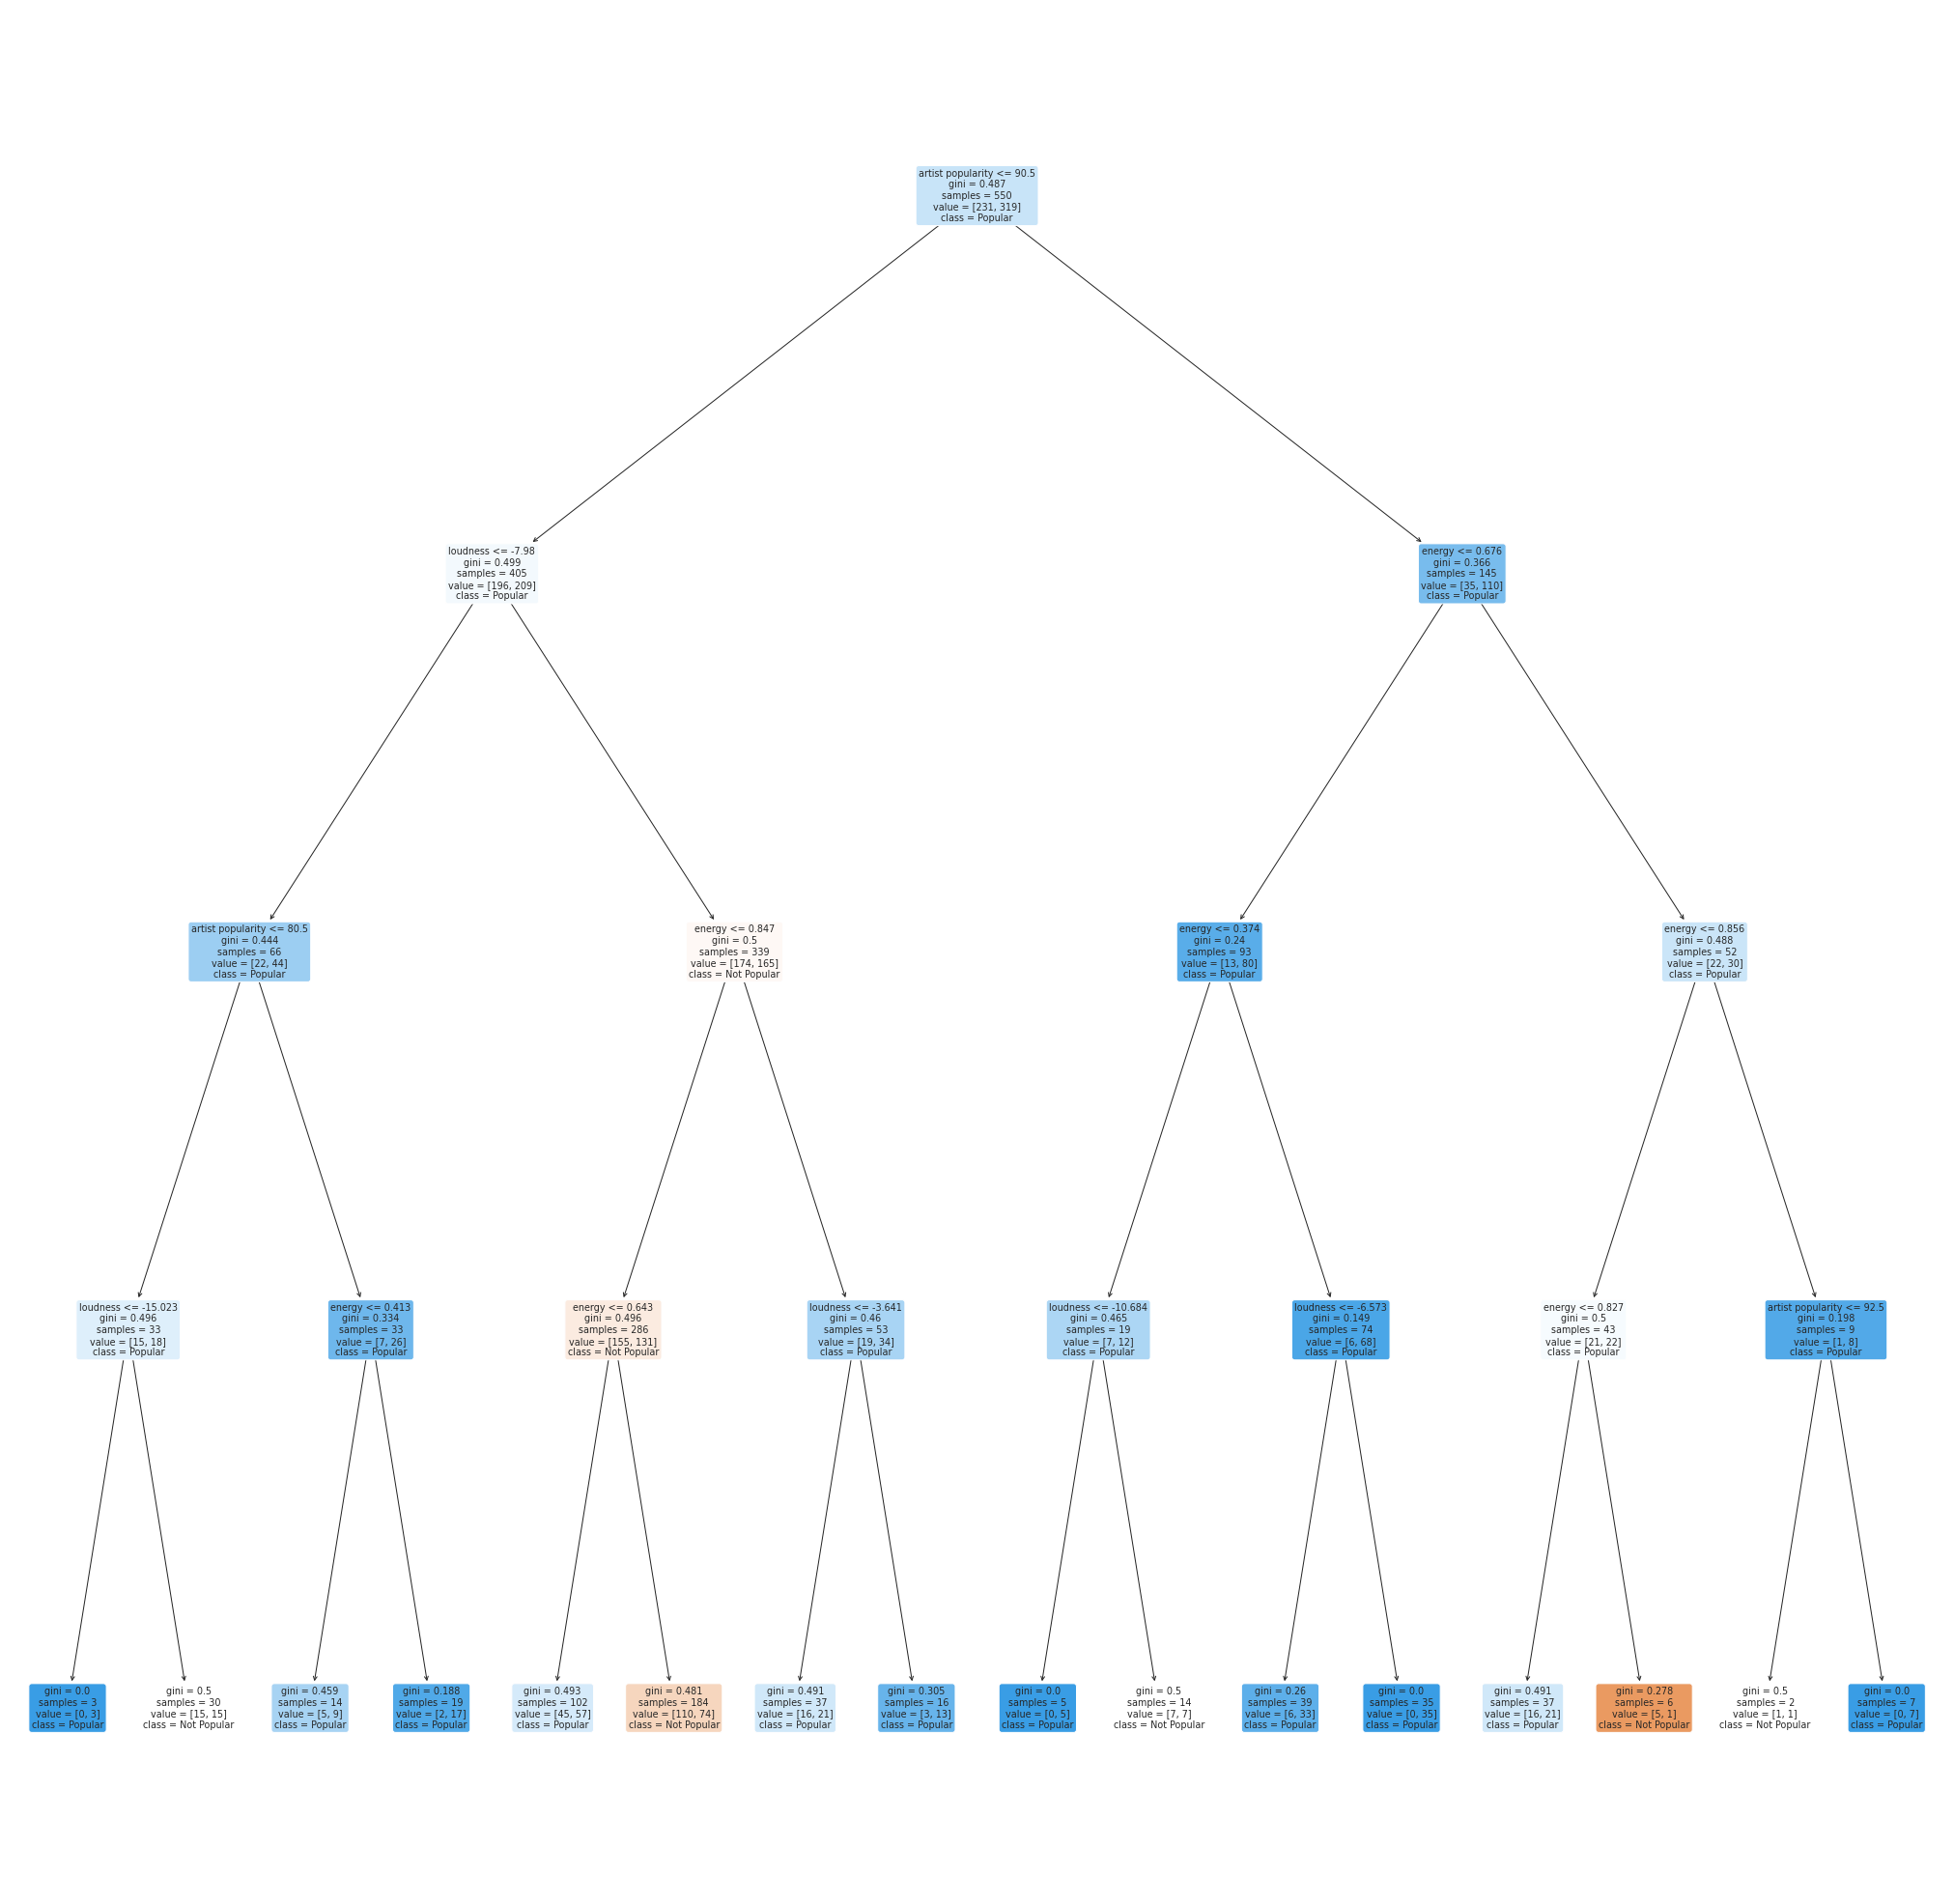

In [36]:

# Extract Response and Predictors
y = pd.DataFrame(songData_top3['popularity categorical'])
X = pd.DataFrame(songData_top3.drop(['popularity categorical','popularity'], axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=88)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4) 
dectree.fit(X_train, y_train)                    # train the decision tree modelz

# Plot the trained Decision Tree
f = plt.figure(figsize=(36,36))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Not Popular","Popular"])

##**Training Data Top 3 Factors**

Train Data
Accuracy  :	 0.6527272727272727

TPR Train :	 0.6927899686520376
TNR Train :	 0.5974025974025974

FPR Train :	 0.4025974025974026
FNR Train :	 0.3072100313479624


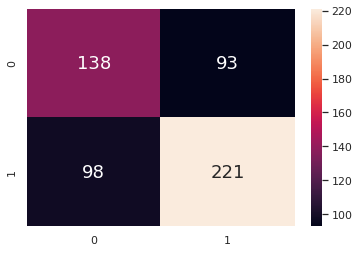

In [37]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

## **Test Data Top 3 Factors**

Test Data
Accuracy  :	 0.5507246376811594

TPR Test :	 0.6081081081081081
TNR Test :	 0.484375

FPR Test :	 0.515625
FNR Test :	 0.3918918918918919


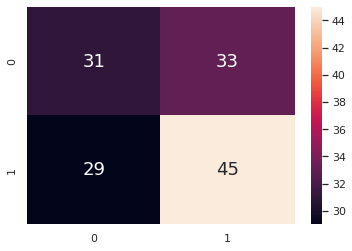

In [38]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

**Analysis**:
The test accuracy of 55% represents an improvement from the 49% test accuracy obtained earlier. Hence, our model's prediction accuracy improves when we are using **only the key features** to predict popularity using the decision tree. 

## **Varying Depth of Decision Tree**

The depth of the tree was then varied from a max depth of 4 to a max depth of 6 to see if the classification accuracy improves.

[Text(0.5380859375, 0.9285714285714286, 'artist popularity <= 90.5\ngini = 0.487\nsamples = 550\nvalue = [231, 319]\nclass = Popular'),
 Text(0.27734375, 0.7857142857142857, 'loudness <= -7.98\ngini = 0.499\nsamples = 405\nvalue = [196, 209]\nclass = Popular'),
 Text(0.109375, 0.6428571428571429, 'artist popularity <= 80.5\ngini = 0.444\nsamples = 66\nvalue = [22, 44]\nclass = Popular'),
 Text(0.046875, 0.5, 'loudness <= -15.023\ngini = 0.496\nsamples = 33\nvalue = [15, 18]\nclass = Popular'),
 Text(0.03125, 0.35714285714285715, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Popular'),
 Text(0.0625, 0.35714285714285715, 'energy <= 0.48\ngini = 0.5\nsamples = 30\nvalue = [15, 15]\nclass = Not Popular'),
 Text(0.03125, 0.21428571428571427, 'loudness <= -9.689\ngini = 0.475\nsamples = 18\nvalue = [11, 7]\nclass = Not Popular'),
 Text(0.015625, 0.07142857142857142, 'gini = 0.497\nsamples = 13\nvalue = [6, 7]\nclass = Popular'),
 Text(0.046875, 0.07142857142857142, 'gini = 0.0\nsamples =

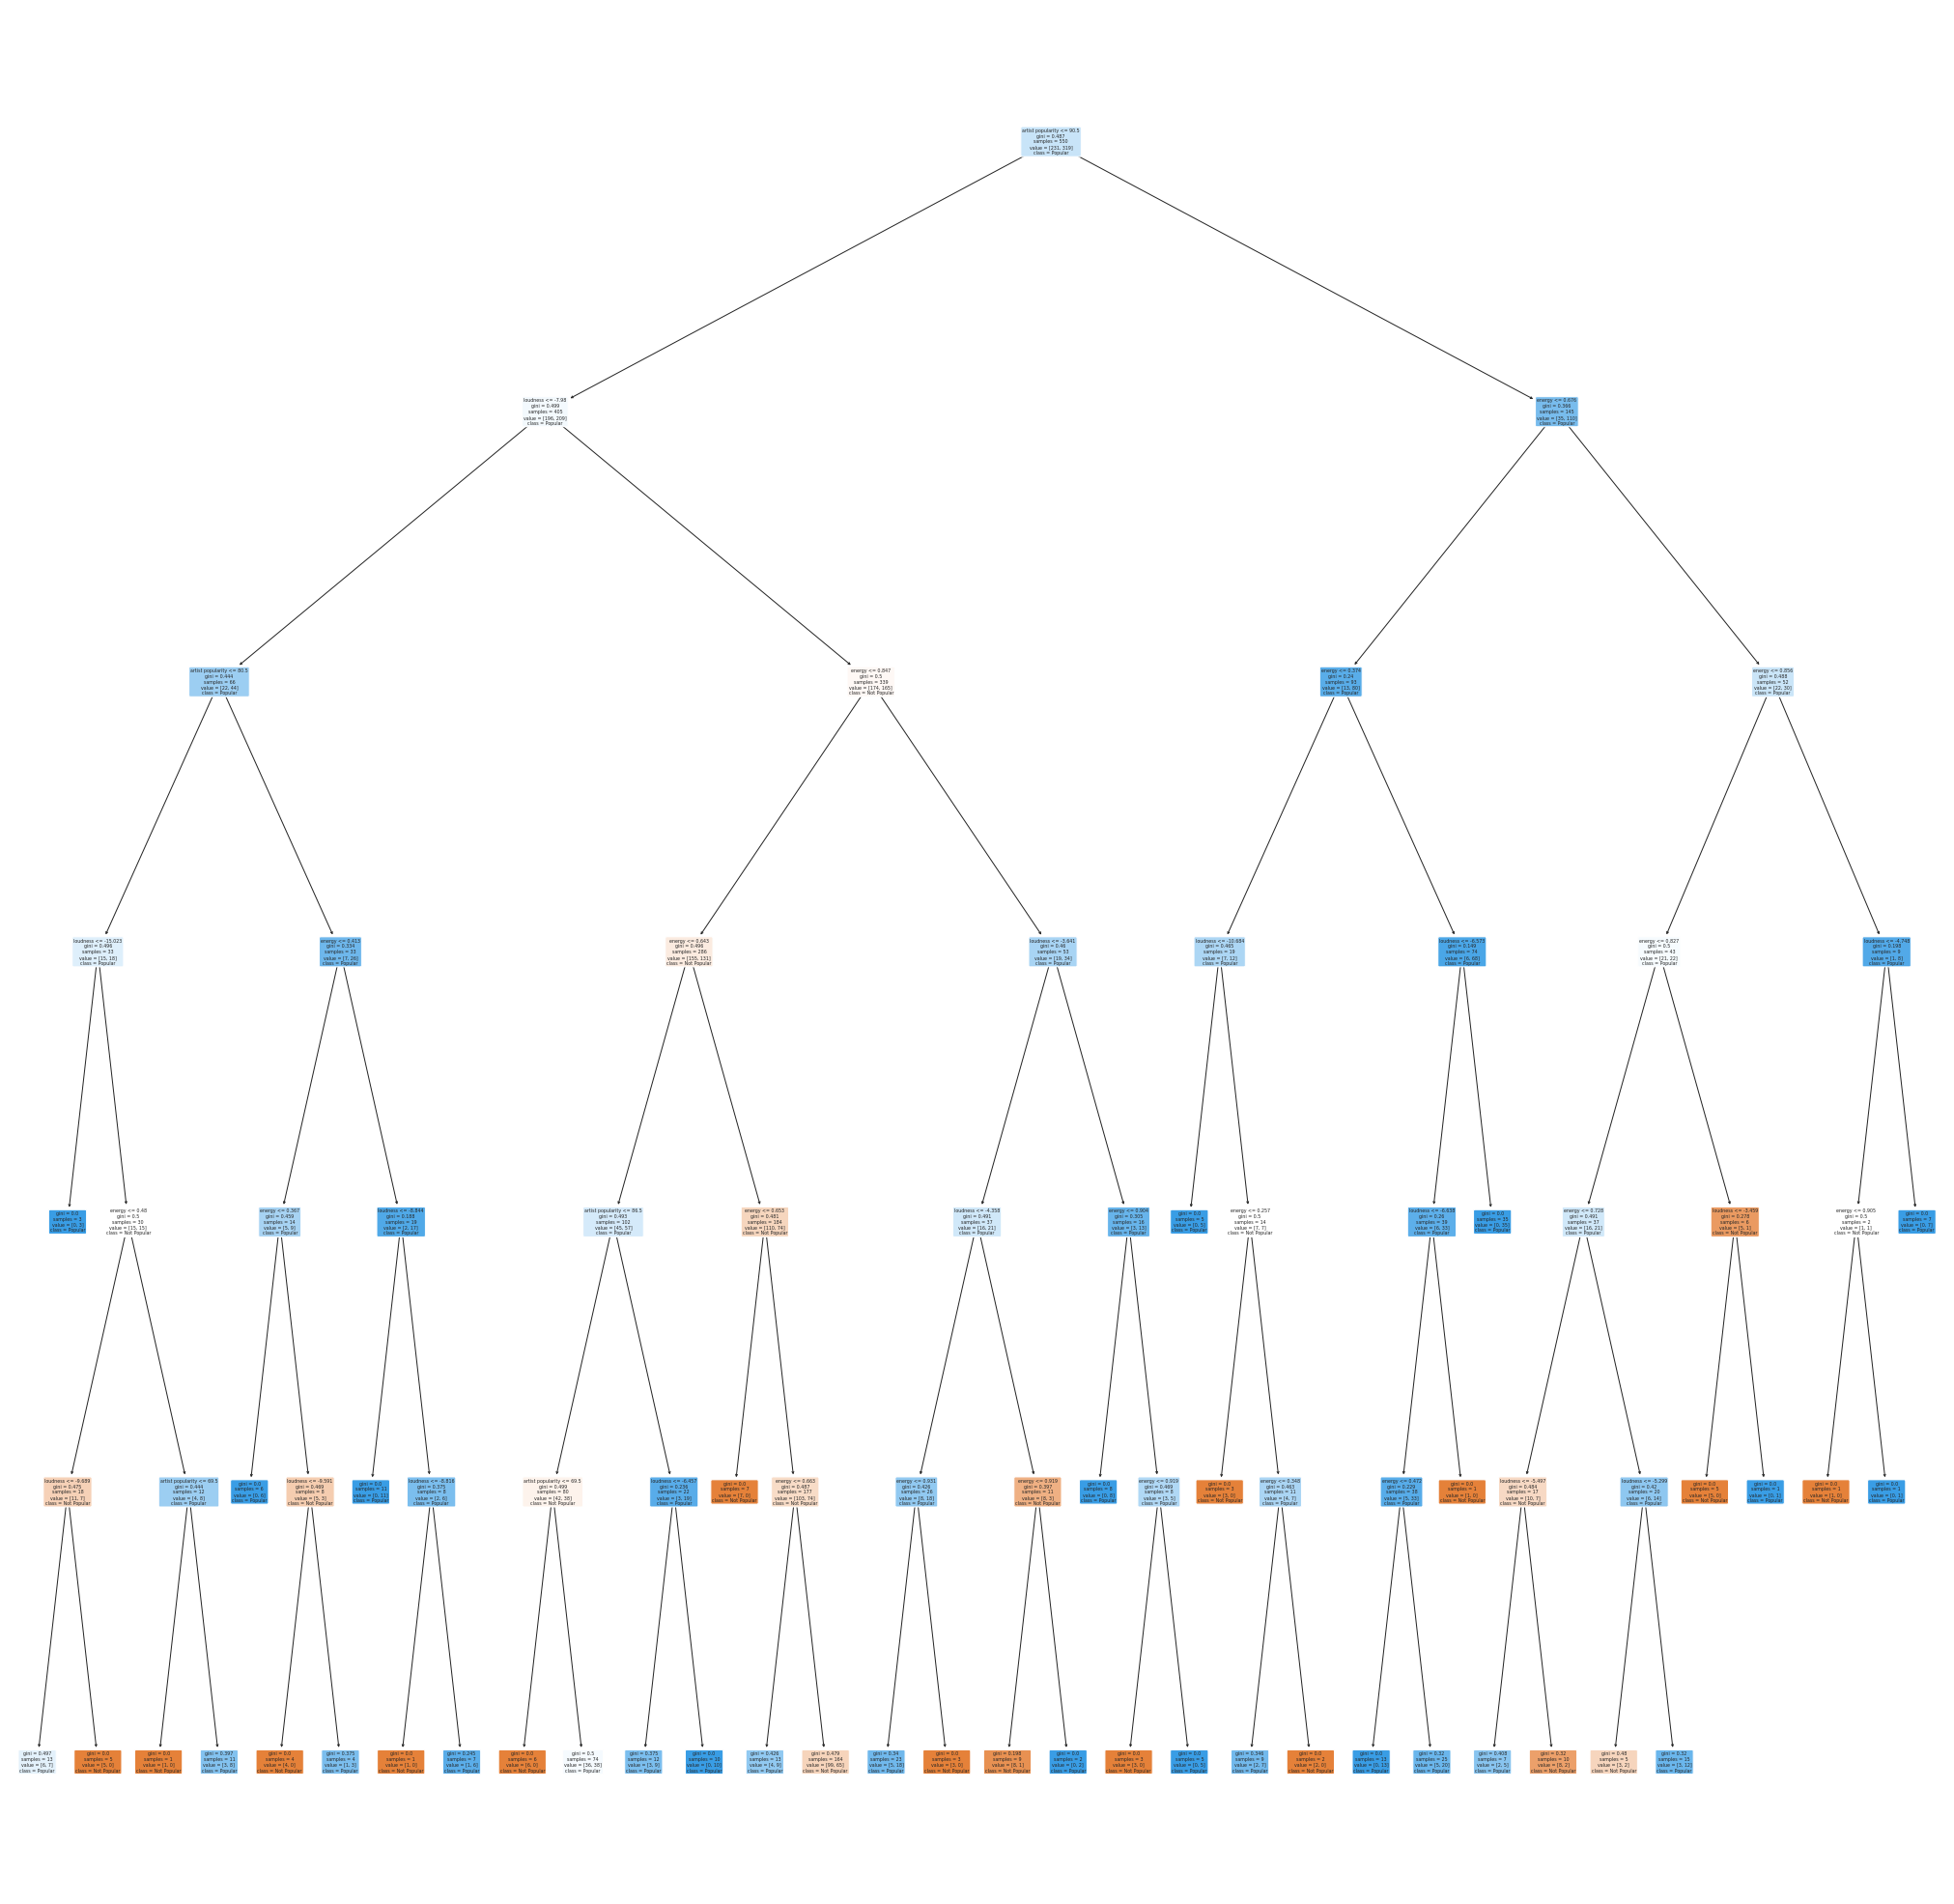

In [42]:
# Extract Response and Predictors
y = pd.DataFrame(songData_top3['popularity categorical'])
X = pd.DataFrame(songData_top3.drop(['popularity categorical','popularity'], axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=88)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=6)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree modelz

# Plot the trained Decision Tree
f = plt.figure(figsize=(36,36))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Not Popular","Popular"])

Train Data
Accuracy  :	 0.7436363636363637

TPR Train :	 0.780564263322884
TNR Train :	 0.6926406926406926

FPR Train :	 0.30735930735930733
FNR Train :	 0.219435736677116


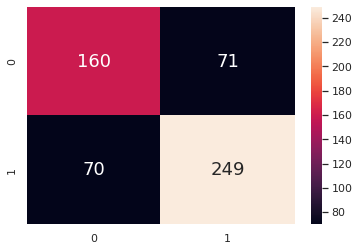

In [43]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.5652173913043478

TPR Test :	 0.6081081081081081
TNR Test :	 0.515625

FPR Test :	 0.484375
FNR Test :	 0.3918918918918919


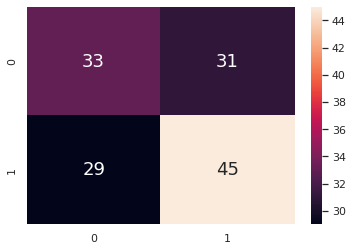

In [44]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

**Analysis**:
The test accuracy of 56% represents a slightly higher classification accuracy as compared to when a max depth of 4 was used, where we obtained an accuracy of 55%. Hence, perhaps we can use a model to find the optimal depth, such as gridsearchCV, which will be discussed in the notebooks following this.